## **Exploratory Data Analysis**

This section examines the raw Singapore Airlines reviews dataset to uncover key patterns, trends, and insights about customer sentiments and review characteristics.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("../data/singapore_airlines_reviews.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   published_date      10000 non-null  object
 1   published_platform  10000 non-null  object
 2   rating              10000 non-null  int64 
 3   type                10000 non-null  object
 4   text                10000 non-null  object
 5   title               9999 non-null   object
 6   helpful_votes       10000 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 547.0+ KB


In [3]:
data.head()

,published_date,published_platform,rating,type,text,title,helpful_votes
0,2024-03-12T14:41:14-04:00,Desktop,3,review,We used this airline to go from Singapore to L...,Ok,0
1,2024-03-11T19:39:13-04:00,Desktop,5,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0
2,2024-03-11T12:20:23-04:00,Desktop,1,review,"Booked, paid and received email confirmation f...",Don’t give them your money,0
3,2024-03-11T07:12:27-04:00,Desktop,5,review,"Best airline in the world, seats, food, servic...",Best Airline in the World,0
4,2024-03-10T05:34:18-04:00,Desktop,2,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0


In [4]:
data.describe()

,rating,helpful_votes
count,10000.000000,10000.000000
mean,4.015800,1.275200
std,1.346006,2.721618
min,1.000000,0.000000
25%,3.000000,0.000000
50%,5.000000,1.000000
75%,5.000000,2.000000
max,5.000000,158.000000


In [5]:
data['published_platform'].value_counts()

,count
published_platform,
Desktop,7352
Mobile,2648


In [6]:
data['type'].value_counts()

,count
type,
review,10000


In [7]:
data['text'][0]

"We used this airline to go from Singapore to London Heathrow. We had issues with tickets as they cancelled one of the tickets and trying to get it sorted cost a lot of money due to roaming charges for the lengthy phone calls which were needed to get the ticket reinstated and them trying to charge varying amounts to resolve it. This was a very poor service. \n\nWe got to the airport and had to check in at the desk due to this issue which meant online check in couldn't be done. We were in premium economy which was spacious, two seats on either side of the plane and 3 seats in the middle. The plane seemed relatively new but not brand new. Legroom was good, seats were wider and had bigger arm rest in between the two seats which had the fold away tray tables in. There was a good choice of movies and other things such as TV shows, games etc. The food was ok, didn't seem to be much different from economy standard. The flight crew seemed friendly enough. They didn't really go up and down the 

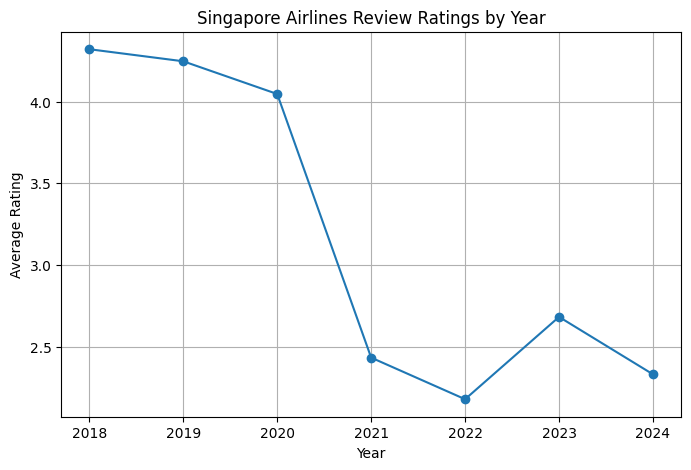

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# If your dataframe is called "data"
df = data.copy()

# Assuming df has published_date (datetime) and rating
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce', utc = True)
df.dropna(subset=['published_date'], inplace=True)

# Group by year
rating_by_year = df.groupby(df['published_date'].dt.year)['rating'].mean()

# Plot
plt.figure(figsize=(8,5))
plt.plot(rating_by_year.index, rating_by_year.values, marker='o')
plt.title("Singapore Airlines Review Ratings by Year")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.grid(True)
plt.show()





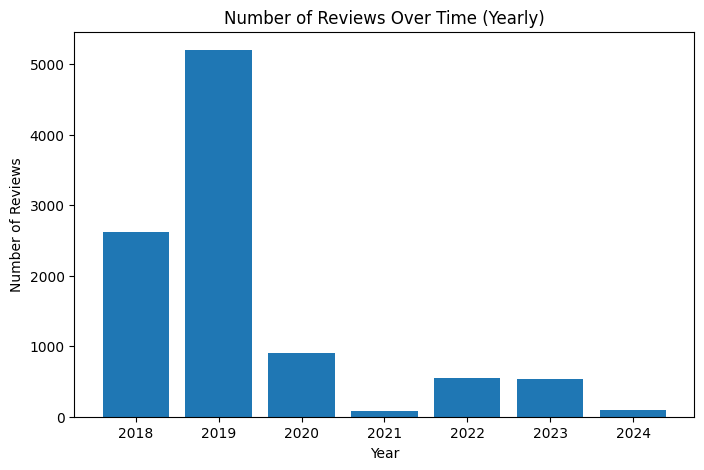

In [9]:
df1 = data.copy()

#Convert to datetime, handling mixed timezones
df1['published_date'] = pd.to_datetime(df1['published_date'], errors='coerce', utc=True)

#Drop any rows where the date couldn't be parsed
df1.dropna(subset=['published_date'], inplace=True)

#Count reviews per year
reviews_per_year = df1.groupby(df['published_date'].dt.year)['rating'].count()

plt.figure(figsize=(8,5))
plt.bar(reviews_per_year.index, reviews_per_year.values)
plt.title("Number of Reviews Over Time (Yearly)")
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.show()


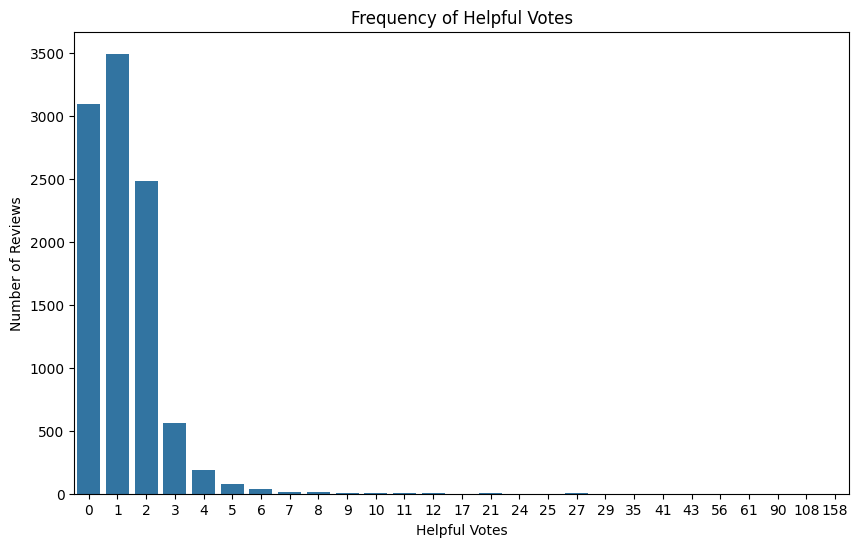

In [10]:
import matplotlib.pyplot as plt

import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(x='helpful_votes', data=data)
plt.title("Frequency of Helpful Votes")
plt.xlabel("Helpful Votes")
plt.ylabel("Number of Reviews")
plt.show()


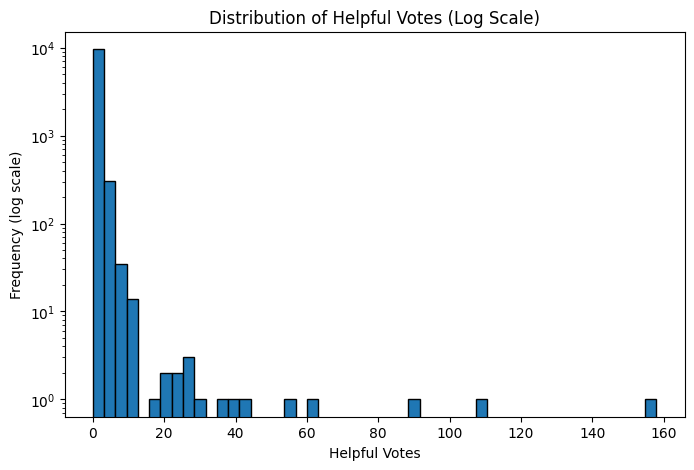

In [11]:
plt.figure(figsize=(8,5))
data['helpful_votes'].plot(kind='hist', bins=50, edgecolor='black', logy=True)
plt.title("Distribution of Helpful Votes (Log Scale)")
plt.xlabel("Helpful Votes")
plt.ylabel("Frequency (log scale)")
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 20 words: [('service', 6829), ('food', 5551), ('good', 5226), ('time', 3687), ('economy', 3581), ('seats', 3465), ('class', 3413), ('seat', 3261), ('staff', 3224), ('great', 2922), ('crew', 2822), ('one', 2787), ('would', 2730), ('business', 2478), ('comfortable', 2269), ('flights', 2209), ('cabin', 2131), ('fly', 2120), ('experience', 2076), ('always', 2072)]


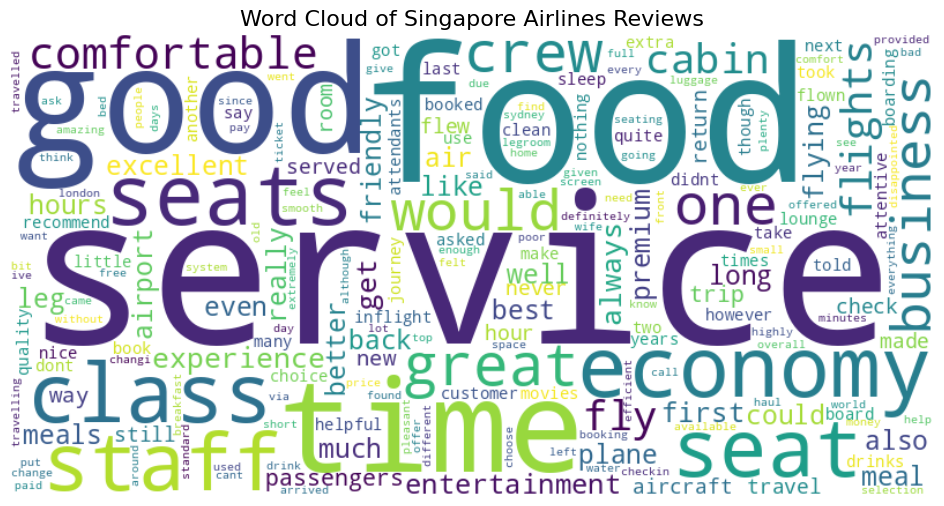

In [13]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
import re

# Assuming 'data' is your DataFrame
df = data.copy()

# Make sure you have stopwords downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

#keywords to exclude
custom_exclusions = {'singapore', 'airlines', 'flight', 'airline', 'sia'}
stop_words.update(custom_exclusions)

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = [word for word in text.split() if word not in stop_words and len(word) > 2]
    return words

# Apply cleaning to all reviews
df['tokens'] = df['text'].apply(clean_text)

# Flatten list of all tokens
all_words = [word for tokens in df['tokens'] for word in tokens]

# Frequency count
word_freq = Counter(all_words)

# Top 20 frequent words
print("Top 20 words:", word_freq.most_common(20))

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Singapore Airlines Reviews", fontsize=16)
plt.show()
